In [129]:
import numpy as np
import torch 
import json 
from ast import literal_eval

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [229]:
path = '../trained_models/CIFAR10_cifar_model_large_Unstructured_BiC_FullClamp_0to0.22/prune/2--k-0.2200_trainer-bilevel_epochs-100_arch-cifar_model_large'
fin = open(f'{path}/lip.json', 'r')
lips = []
for line in fin.readlines():
    lip = literal_eval(line)
    nlip = {}
    for km in lip.keys():
        for kn in lip[km].keys():
            nlip[km + '_' + kn] = lip[km][kn]
    lips.append(nlip)
fin.close()

weight = torch.load(f'{path}/checkpoint/model_best.pth.tar')
epoch = weight['epoch']
precision = weight['best_prec1']
alpha = path.split('/')[2].split('to')[-1]

fin = open(f"{path}/setup.log", 'r')
precs = []
for line in fin.readlines():
    if 'Epoch' in line:
        precs.append(float(line.split()[6].replace(',', '')))

In [230]:
df = pd.DataFrame(lips)

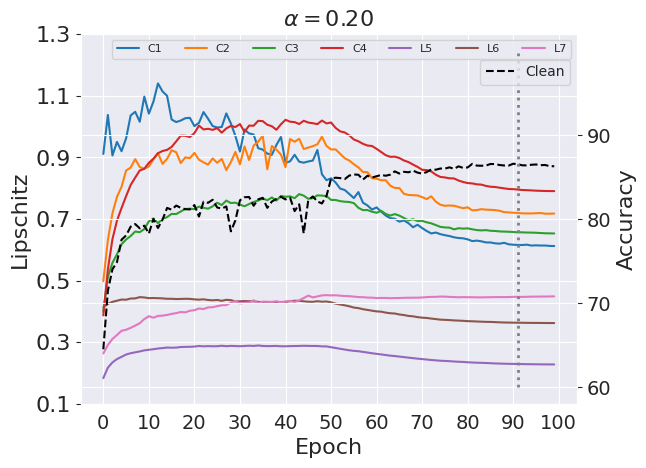

In [360]:
sns.set_style("darkgrid")

ax1 = plt.subplot()

plt.plot(df['conv1.popup_scores_lc'], label='C1')
plt.plot(df['conv2.popup_scores_lc'], label='C2')
plt.plot(df['conv3.popup_scores_lc'], label='C3')
plt.plot(df['conv4.popup_scores_lc'], label='C4')
plt.plot(df['linear1.popup_scores_lc'], label='L5')
plt.plot(df['linear2.popup_scores_lc'], label='L6')
plt.plot(df['linear3.popup_scores_lc'], label='L7')
# plt.vlines(x=epoch, colors='black', ymin=0.1, ymax=1.2, ls='--')
plt.legend(loc='upper right', fancybox=True, ncol=7, fontsize=8)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Lipschitz', fontsize=16)
plt.title(r'$\alpha=0.20$', fontsize=16)
plt.xticks(list(range(0, 110, 10)), fontsize=14)
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3], fontsize=16)

ax2 = ax1.twinx()

plt.plot(precs, '--', label='Clean', color='black')
plt.vlines(x=epoch, colors='gray', ymin=60, ymax=100, ls=':', linewidth=2)
# plt.text(x=50, y=85, s=r"Lowest Lipschitz and Best Accuracy", fontsize=12)
plt.ylabel("Accuracy", fontsize=16)
plt.yticks([60, 70, 80, 90], fontsize=14)
plt.legend(bbox_to_anchor=[1,0.95])





plt.savefig(f"{path.split('/')[2]}.pdf", dpi=600, bbox_inches="tight")

In [273]:
for k in weight['state_dict'].keys():
    if 'popup' in k:
        print (np.prod([x for x in weight['state_dict'][k].size()]))

864
16384
18432
65536
2097152
262144
5120
